## 期末專題題目:
### 議會質詢統計

- 1.類別分析
    - 哪類較多筆
    - 個人各類幾筆
- 2.個別次數分析
    - 個人總共幾次書面質詢
    - 某個時間區間此類別很多筆
- 3.時間分析
    - 某議員在特定月份較多書面質詢




In [1]:
import re
import numpy as np
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [2]:
table = []

for i in range(20,108):  # 20~107
    url = f"https://tcckm.tcc.gov.tw/tccgazFront/qnews/qnews_forTCC.jsp?t=4&groupingType=1&gTrmPrdCnltype=&dept_name=&page={i}"
    try:
        response = rq.get(url)              # 用 requests 的 get 方法把網頁抓下來
        print("下載成功")
    except Exception as err:
        print(f"網頁下載失敗: {err}")
        break
    
    html_doc = response.text                    # text 屬性就是 html 檔案(全部)
    soup = BeautifulSoup(html_doc, "lxml")      # 指定 lxml 作為解析器(才能搜尋想爬的內容)
    fs = soup.find_all("td", class_="center")   # 爬出(書面質詢紀錄)所有內容
    
    all_txt = []                                # 只保留 text 並以 list 存起來(每一頁用list存起來才能用split&slice)
    for f in fs:
        all_txt.append(f.text)
    
    
    data = all_txt[0].split('\n')                           # all_txt 以換行符號分開
    new_data = data[178:-8]                                 # 保留需要的資訊
    data_list = [x for x in new_data if not x.isdigit()]    # 扣除順序(以利顯示)

    page_txt = [t for t in data_list if len(t) > 1]                         # 扣除''(只保留文字)
    page_txt = [re.sub(r'。','',t)for t in page_txt]                        # 扣除句號(後來發現有句號在名字裡)
    page_txt = page_txt[6:]
    page_detail = [page_txt[i:i+4] for i in range(0, len(page_txt), 4)]     # 每6個元素一組建立新的 list
    table.append(page_detail)
table = np.concatenate(table, axis=0)       # 因為不同頁面list會分隔,我只要一個[]就好       
table = np.asarray(table)                   # 存成 numpy array
table = np.delete(table,2,1)                # 去除質詢題目(字太多會爬很久)
print(table)                                # 確認內容


下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
網頁下載失敗: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
網頁下載失敗: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
網頁下載失敗: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
網頁下載失敗: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
下載成功
[['民國113年04月01日' '民政' '顏若芳']
 ['民國113年03月29日' '工務' '葉林傳']
 ['民國113年03月29日' '民政' '張志豪']
 ...
 ['民國112年02月10日' '交通' '陳政忠']
 ['民國112年02月10日' '交通' '徐巧芯']
 ['民國112年02月10日' '工務' '王欣儀']]


In [3]:
df = pd.DataFrame(table, columns=["Date", "Category", "Name"])     # 用 pandas dataframe 輸出
df.to_csv(f"./table_20to107.csv", encoding="utf_8_sig")
df

,Date,Category,Name
0,民國113年04月01日,民政,顏若芳
1,民國113年03月29日,工務,葉林傳
2,民國113年03月29日,民政,張志豪
3,民國113年03月29日,交通,林杏兒
4,民國113年03月28日,交通,張斯綱
...,...,...,...
835,民國112年02月13日,交通,吳世正
836,民國112年02月13日,工務,徐立信
837,民國112年02月10日,交通,陳政忠
838,民國112年02月10日,交通,徐巧芯


In [4]:
row_data = pd.read_csv("./table_20to107.csv", encoding="utf_8_sig", index_col=0)
print(row_data)     # 檢查
# type(row_data['Date'][0])   # 確認是string

             Date Category Name
0    民國113年04月01日       民政  顏若芳
1    民國113年03月29日       工務  葉林傳
2    民國113年03月29日       民政  張志豪
3    民國113年03月29日       交通  林杏兒
4    民國113年03月28日       交通  張斯綱
..            ...      ...  ...
835  民國112年02月13日       交通  吳世正
836  民國112年02月13日       工務  徐立信
837  民國112年02月10日       交通  陳政忠
838  民國112年02月10日       交通  徐巧芯
839  民國112年02月10日       工務  王欣儀

[840 rows x 3 columns]


### translate time to AD for panda timesamp  

In [5]:
''' 將民國換成西元以便轉成panda timestamp '''

def turn_AD(date_str):
    date = re.findall(r'\d+',date_str)
    date[0] = str(int(date[0]) + 1911)
    date ='/'.join(date)
    return date

def turn_Timestamp(df):
    day = []        
    for i in range(len(df)):
        date_str = df["Date"][i]
        # print(date_str)
        day.append(turn_AD(date_str))
    # print(day)
    dayf = pd.DataFrame(day, columns=["Date"])
    df = df.copy()
    df['Date']= pd.to_datetime(dayf['Date'])    # 之後才能算時間區間
    return df
df = turn_Timestamp(row_data)

print(type(df['Date'][0]),"\n")       #確認成功轉換
print(df)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 

          Date Category Name
0   2024-04-01       民政  顏若芳
1   2024-03-29       工務  葉林傳
2   2024-03-29       民政  張志豪
3   2024-03-29       交通  林杏兒
4   2024-03-28       交通  張斯綱
..         ...      ...  ...
835 2023-02-13       交通  吳世正
836 2023-02-13       工務  徐立信
837 2023-02-10       交通  陳政忠
838 2023-02-10       交通  徐巧芯
839 2023-02-10       工務  王欣儀

[840 rows x 3 columns]


### 完成資料蒐集, 畫圖表分析
- 先確認有中文字在mambaforge裡
- 資料分析
    - 某時間區間的個人提案數 

In [6]:
''' 解決畫圖的中文輸入 '''
mpl.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']  # 指定中文字體
mpl.rcParams['axes.unicode_minus'] = False  # 解決負號'-'無法顯示的問題

In [15]:
'''某時間區間的個人提案數'''
def date_filter(_df, date_s='2023-04-06', date_e='2024-04-06'):
    df = _df.copy()
    select = df.loc[(df['Date'] >= date_s) & (df['Date'] < date_e)]
    name_cnt = select["Name"].value_counts()
    return name_cnt[:10]

print("2023/04/06~2024/04/06 個人質詢數目前10名")
print(date_filter(df))


print("\n2024總統大選前半年個人質詢數目前10名")
print(date_filter(df,date_s="2023-07-15",date_e="2024-01-15"))


print("\n2023前半年個人質詢數目前10名")
print(date_filter(df,date_s="2023-02-10",date_e="2023-7-30"))

2023/04/06~2024/04/06 個人質詢數目前10名
徐立信     86
詹為元     69
王欣儀     52
許家蓓     45
張志豪     39
林延鳳     33
李傅中武    31
楊植斗     28
李明賢     25
陳宥丞     21
Name: Name, dtype: int64

2024總統大選前半年個人質詢數目前10名
詹為元     44
徐立信     34
王欣儀     34
林延鳳     29
張志豪     27
許家蓓     26
李明賢     17
李傅中武    14
陳宥丞     14
游淑慧     12
Name: Name, dtype: int64

2023前半年個人質詢數目前10名
徐立信     60
王欣儀     28
楊植斗     28
許家蓓     21
詹為元     19
李傅中武    16
林延鳳     15
張文潔     12
鍾佩玲     11
李明賢     10
Name: Name, dtype: int64


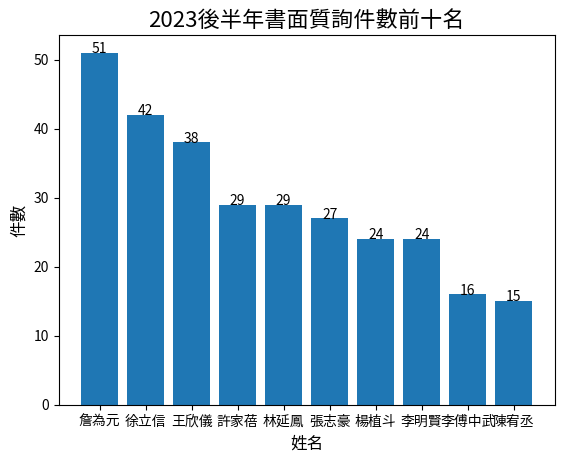

In [52]:
'''正值選舉期間議員的書面質詢件數會減少嗎?'''
def date_filter(_df, date_s='2023-04-06', date_e='2024-04-06'):
    df = _df.copy()
    select = df.loc[(df['Date'] >= date_s) & (df['Date'] < date_e)]
    name_cnt = select["Name"].value_counts()
    return name_cnt[:10]
def bar_chart(df):
    x = df.index
    y = df
    plt.bar(x, y)
    plt.title('2023後半年書面質詢件數前十名', fontsize =16)
    plt.xlabel("姓名", fontsize =12)
    plt.ylabel("件數", fontsize =12)
    for i, v in enumerate(y):
        plt.text(i, v, str(v), ha='center')
    plt.savefig('halfyear_thebest10.png')
    plt.show()    

a = date_filter(df,date_s="2023-06-01",date_e="2023-12-30")
bar_chart(a.iloc[:10])

In [19]:
''' 以部門分類 '''

def filter_category_latest(_df, date_s='2023-05-30', date_e='2023-12-30', category="交通"):
    df = _df.copy()
    df_filtered = df.loc[(df['Date'] >= date_s) & (df['Date'] < date_e) & (df['Category']==category)]
    name_cnt = df_filtered["Name"].value_counts()
    print(f"2023後半年關於{category}部門書面質詢有: {len(df_filtered)} 筆")
    print(f"針對{category}部門書面質詢前十名的人如下：")
    print(name_cnt[:10])

cats = ["交通", "工務", "警政衛生", "民政", "教育", "財政建設"]
for c in cats:
    filter_category_latest(df, category= c)
    print("----------------------------------")


2023後半年關於交通部門書面質詢有: 90 筆
針對交通部門書面質詢前十名的人如下：
詹為元    15
徐立信    13
陳宥丞     6
林延鳳     6
鍾佩玲     5
許家蓓     4
許淑華     3
張志豪     3
李明賢     3
張斯綱     2
Name: Name, dtype: int64
----------------------------------
2023後半年關於工務部門書面質詢有: 102 筆
針對工務部門書面質詢前十名的人如下：
詹為元    12
徐立信     8
王欣儀     7
許家蓓     6
陳怡君     6
李明賢     5
顏若芳     4
楊植斗     4
張志豪     4
葉林傳     4
Name: Name, dtype: int64
----------------------------------
2023後半年關於警政衛生部門書面質詢有: 81 筆
針對警政衛生部門書面質詢前十名的人如下：
張志豪    10
徐立信    10
詹為元     9
王欣儀     7
許家蓓     5
李明賢     4
楊植斗     4
陳宥丞     4
林延鳳     4
秦慧珠     3
Name: Name, dtype: int64
----------------------------------
2023後半年關於民政部門書面質詢有: 74 筆
針對民政部門書面質詢前十名的人如下：
王欣儀     11
林延鳳      7
李明賢      6
楊植斗      6
陳重文      6
李傅中武     5
許家蓓      5
詹為元      3
張斯綱      3
徐立信      3
Name: Name, dtype: int64
----------------------------------
2023後半年關於教育部門書面質詢有: 91 筆
針對教育部門書面質詢前十名的人如下：
詹為元     8
張志豪     7
許家蓓     7
徐立信     6
李明賢     6
林延鳳     6
王欣儀     6
李傅中武    5
何孟樺     5
鍾佩玲     3
Name: Name, dtype: int64


In [22]:
def filter_category_former(_df, date_s='2023-03-01', date_e='2023-06-30', category="交通"):
    df = _df.copy()
    df_filtered = df.loc[(df['Date'] >= date_s) & (df['Date'] < date_e) & (df['Category']==category)]
    name_cnt = df_filtered["Name"].value_counts()
    print(f"2023/3/1~2023/6/30關於{category}部門書面質詢有: {len(df_filtered)} 筆")
    print(f"針對{category}部門書面質詢前十名的人如下：")
    print(name_cnt[:10])

filter_category_former(df, category="交通")

2023/3/1~2023/6/30關於交通部門書面質詢有: 43 筆
針對交通部門書面質詢前十名的人如下：
徐立信    10
張文潔     4
許家蓓     4
王欣儀     3
李芳儒     3
鍾佩玲     2
柳采葳     2
張志豪     2
李明賢     2
何孟樺     2
Name: Name, dtype: int64


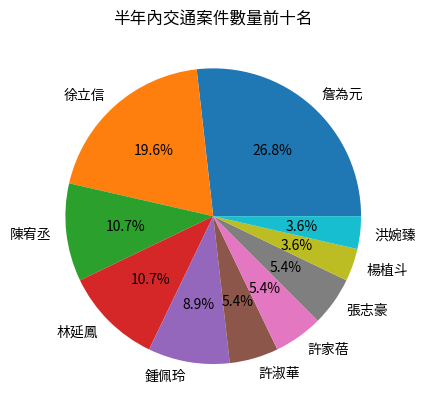

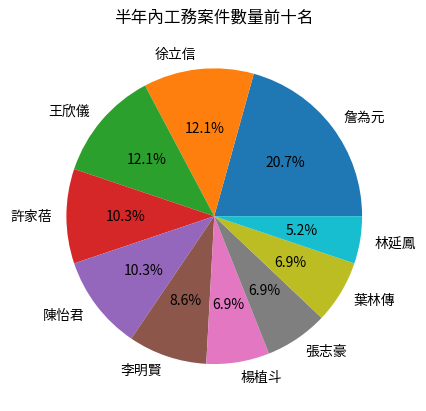

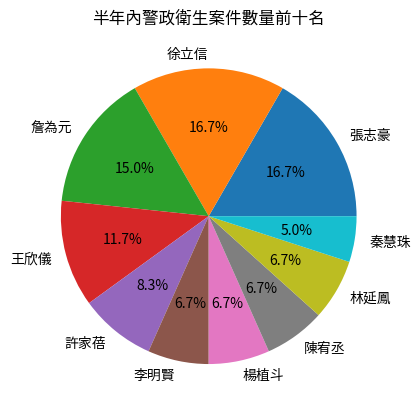

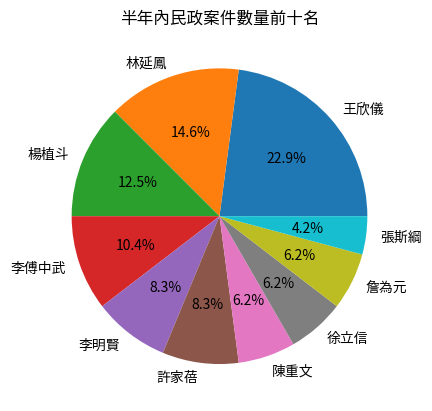

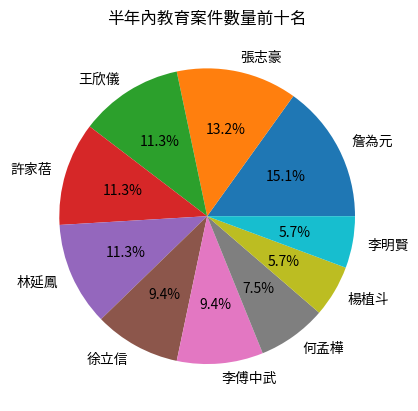

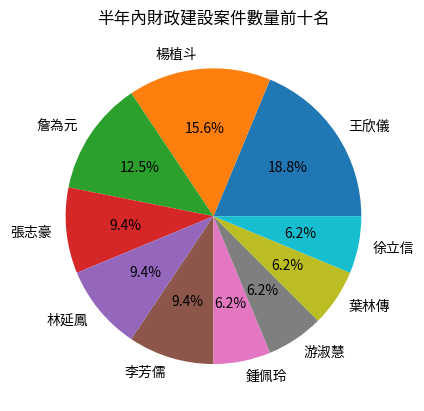

In [23]:
def pie_chart(df,category:str,name:str):
    txt = df.index
    n = df
    plt.pie(n, labels=txt,autopct="%1.1f%%")
    plt.title(f'半年內{category}案件數量前十名')
    plt.savefig(f'{name}')
    plt.show()
   
def create_pie_chart(_df, category):
    df = _df.copy()
    df_filtered = df.loc[(df['Date'] >= '2023-06-30') & (df['Date'] < '2023-12-30') & (df['Category']==category)]
    name_cnt = df_filtered["Name"].value_counts()
    pie_chart(name_cnt.iloc[:10],category,f"halfyear_{category}")

print("")
for c in cats:
    create_pie_chart(df, c)

In [29]:
'''某時間區間提案少於五件的議員名單'''
a=[]
df_filtered = df.loc[(df['Date'] >= '2023-01-01') & (df['Date'] < '2023-12-01')]
name_cnt = df_filtered["Name"].value_counts()
print("2022整年書面質詢少於五件的議員名單：")
for n, v in zip(name_cnt.index, name_cnt):
    if v <= 5:
        print(n,v)
        a.append(v) #查看總共幾位
print(f"總共有: {len(a)+1} 位議員") 

2022整年書面質詢少於五件的議員名單：
柳采葳 5
郭昭巖 4
林珍羽 4
陳賢蔚 3
侯漢廷 3
苗博雅 2
王世堅 2
劉耀仁 2
趙怡翔 2
陳炳甫 2
汪志冰 1
洪健益 1
戴錫欽 1
陳宥丞、張志豪 1
總共有: 15 位議員


2023-02-01    15
2023-03-01     9
2023-04-01     9
2023-05-01    16
2023-06-01    10
2023-07-01    20
2023-08-01    13
2023-09-01    11
2023-10-01    16
2023-11-01    10
2023-12-01    10
Name: Date, dtype: int64


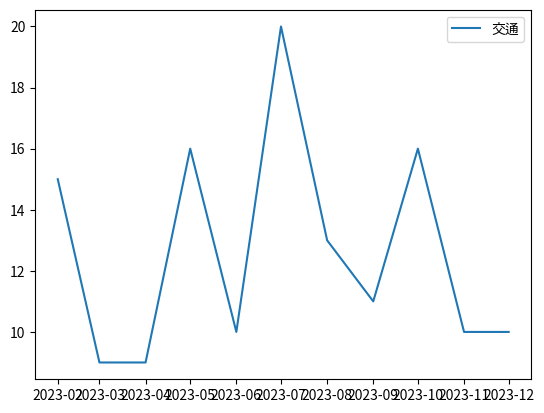

2023-02-01     6
2023-03-01    17
2023-04-01    10
2023-05-01    15
2023-06-01     8
2023-07-01    23
2023-08-01    14
2023-09-01    20
2023-10-01     8
2023-11-01    15
2023-12-01    14
Name: Date, dtype: int64


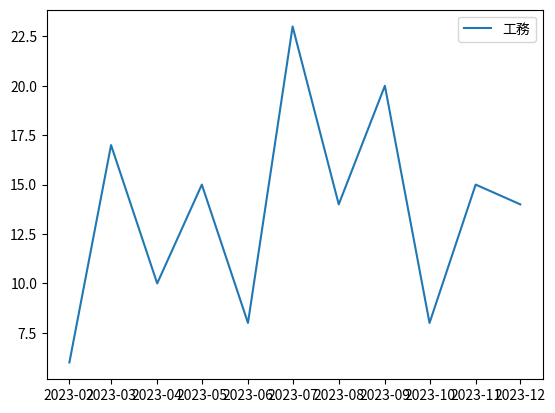

2023-02-01     2
2023-03-01    14
2023-04-01     4
2023-05-01    12
2023-06-01     1
2023-07-01    16
2023-08-01    11
2023-09-01    13
2023-10-01    12
2023-11-01    22
2023-12-01     6
Name: Date, dtype: int64


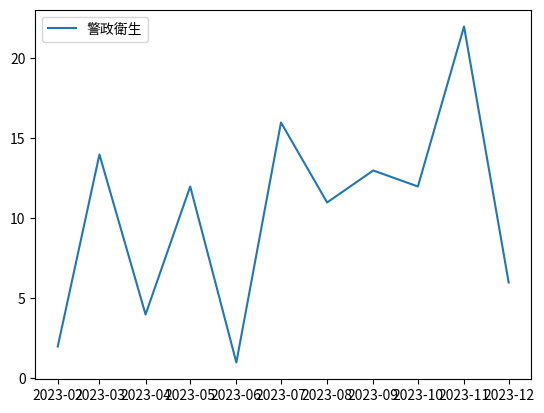

2023-02-01     4
2023-03-01    24
2023-04-01    22
2023-05-01    11
2023-06-01    11
2023-07-01    17
2023-08-01    10
2023-09-01    10
2023-10-01     8
2023-11-01    10
2023-12-01     8
Name: Date, dtype: int64


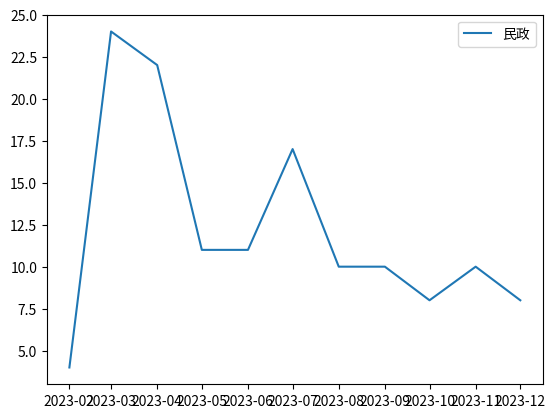

2023-02-01     6
2023-03-01    14
2023-04-01     6
2023-05-01     8
2023-06-01    13
2023-07-01    17
2023-08-01     8
2023-09-01    12
2023-10-01    16
2023-11-01    15
2023-12-01    10
Name: Date, dtype: int64


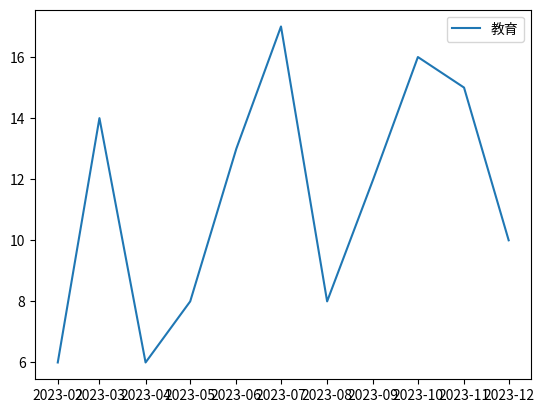

2023-02-01     2
2023-03-01     3
2023-04-01     7
2023-05-01     4
2023-06-01     1
2023-07-01     9
2023-08-01     6
2023-09-01     4
2023-10-01    13
2023-11-01     6
2023-12-01     2
Name: Date, dtype: int64


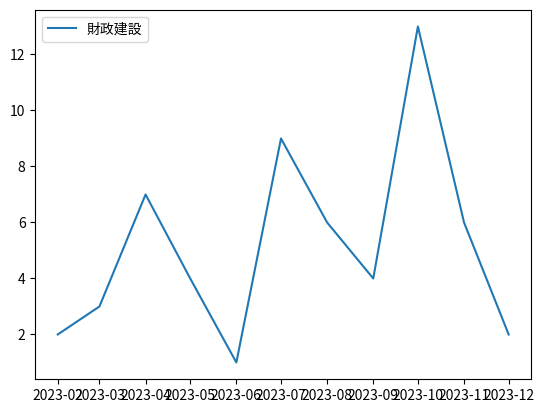

In [30]:


for c in cats:
    df_filtered = df.loc[(df['Date'] >= '2023-01-01') & (df['Date'] < '2023-12-30') & (df['Category']==c)]
    res = df_filtered["Date"].dt.to_period('M').apply(lambda r: r.start_time)
    data = res.value_counts().sort_index()
    print(data)
    plt.plot(data.index,data, label=c)
    plt.legend()
    plt.show()

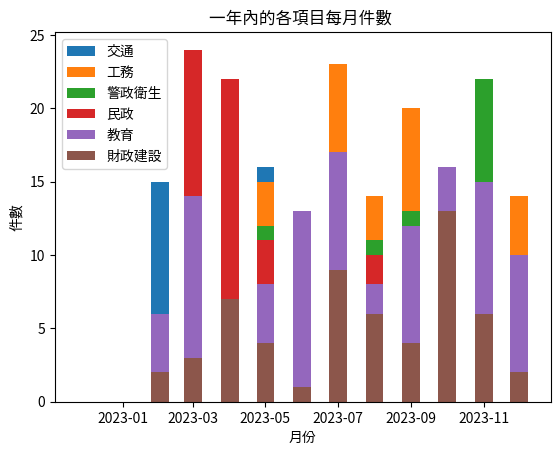

In [32]:
''' 時間區間的警政衛生項目每月幾筆 '''
for c in cats:
    df_filtered = df.loc[(df['Date'] >= '2022-12-01') & (df['Date'] < '2023-12-30') & (df['Category']==c)]
    res = df_filtered["Date"].dt.to_period('M').apply(lambda r: r.start_time)
    data = res.value_counts().sort_index()

    if c == "警政衛生":
        '''警政衛生的月份少了2022-12-01'''
        date = pd.to_datetime('2022-12-01')
        data = pd.concat([data, pd.Series([0], index=[date])])

    plt.bar(data.index,data, label=c,width=15)
plt.title('一年內的各項目每月件數 ')
plt.xlabel('月份')
plt.ylabel('件數')
plt.legend()
plt.savefig('all_item_yearcases.png')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      840 non-null    datetime64[ns]
 1   Category  840 non-null    object        
 2   Name      840 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 58.5+ KB


In [34]:
a = df["Category"].value_counts()
a

工務      169
交通      168
民政      162
教育      144
警政衛生    125
財政建設     72
Name: Category, dtype: int64

In [36]:
def browse(page:int,num:int):
    print(f"查看第{page}頁,第{num}筆:")
    data = (page-1)*10 + (num-1)
    print(df.loc[data])
browse(1,4)

查看第1頁,第4筆:
Date        2024-03-29 00:00:00
Category                     交通
Name                        林杏兒
Name: 3, dtype: object


In [37]:
'''某時間區間的個人提案數'''
def date_filter(st:str,ed:str):    
    # print(all)
    select = df.loc[(df['Date'] >= st) & (df['Date'] < ed)]
    name_cnt = select["Name"].value_counts()
    return select,name_cnt

select, name_cnt = date_filter('2022-05-26','2022-11-26')
name_cnt[:10]

Series([], Name: Name, dtype: int64)

In [38]:
mpl.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']  # 指定中文字體
mpl.rcParams['axes.unicode_minus'] = False  # 解決負號'-'無法顯示的問題

In [55]:
'''某時間區間"交通"項目由誰提案最多(哪一區較常有交通糾紛)'''
df_filtered = df.loc[(df['Date'] >= '2023-4-01') & (df['Date'] < '2024-03-01') & (df['Category']=="交通")]
name_cnt_traffic = df_filtered["Name"].value_counts()
print("總共案件數：",len(df_filtered))
print(name_cnt_traffic)
# df_filtered

總共案件數： 133
徐立信     23
詹為元     20
鍾佩玲      8
陳宥丞      7
許家蓓      7
林延鳳      6
李芳儒      6
張志豪      5
黃瀞瑩      4
張文潔      4
許淑華      3
林杏兒      3
王欣儀      3
何孟樺      3
李明賢      3
林珍羽      2
楊植斗      2
洪婉臻      2
張斯綱      2
柳采葳      2
李傅中武     2
顏若芳      2
游淑慧      2
李彥秀      2
洪健益      1
簡舒培      1
陳政忠      1
陳重文      1
葉林傳      1
徐巧芯      1
王世堅      1
陳炳甫      1
侯漢廷      1
林亮君      1
Name: Name, dtype: int64


In [58]:
'''某時間區間"警政衛生"項目由誰提案最多(哪一區較常有警政衛生糾紛)'''
df_filtered = df.loc[(df['Date'] >= '2023-10-01') & (df['Date'] < '2024-01-30') & (df['Category']=="警政衛生")]
name_cnt_police = df_filtered["Name"].value_counts()
print("總案件數：",len(df_filtered))
print(name_cnt_police)
# df_filtered

總案件數： 42
張志豪    10
徐立信     5
許家蓓     5
林延鳳     4
游淑慧     3
李明賢     3
柳采葳     2
葉林傳     2
陳宥丞     2
秦慧珠     2
詹為元     1
李彥秀     1
林杏兒     1
陳重文     1
Name: Name, dtype: int64


In [61]:
'''某時間區間"民政"項目由誰提案最多(哪一區較常有民政糾紛)'''
df_filtered = df.loc[(df['Date'] >= '2023-10-01') & (df['Date'] < '2024-02-01') & (df['Category']=="民政")]
name_cnt_civilaffairs = df_filtered["Name"].value_counts()
print("共計:",len(df_filtered))
print(name_cnt_civilaffairs)

共計: 28
林延鳳     6
李傅中武    5
李明賢     4
王欣儀     3
許家蓓     2
陳政忠     2
葉林傳     1
林杏兒     1
詹為元     1
柳采葳     1
顏若芳     1
許淑華     1
Name: Name, dtype: int64


In [ ]:
'''某時間區間"教育"項目由誰提案最多(哪一區較常有教育糾紛)'''
df_filtered = df.loc[(df['Date'] >= '2021-12-01') & (df['Date'] < '2022-12-01') & (df['Category']=="教育")]
name_cnt_education = df_filtered["Name"].value_counts()
print(len(df_filtered))
print(name_cnt_education)

In [ ]:
def pie_chart(df,category:str,name:str):
    txt = df.index
    n = df
    plt.pie(n, labels=txt,autopct="%1.1f%%")
    plt.title(f'半年內{category}案件數量前十名')
    plt.savefig(f'{name}')
    plt.show()


In [ ]:
pie_chart(name_cnt_traffic.iloc[:10],'交通',"halfyear_traffics")
pie_chart(name_cnt_police.iloc[:10],'警政衛生',"halfyear_PoliceHygiene")
pie_chart(name_cnt_civilaffairs.iloc[:10],'民政',"halfyear_civilaffairs")
pie_chart(name_cnt_education.iloc[:10],'教育',"halfyear_education")



In [ ]:
'''某時間區間提案少於五件的議員名單'''
a=[]
df_filtered = df.loc[(df['Date'] >= '2021-12-01') & (df['Date'] < '2022-12-01')]
name_cnt = df_filtered["Name"].value_counts()
print("2022整年書面質詢少於五件的議員名單：")
for n, v in zip(name_cnt.index, name_cnt):
    if v <= 5:
        # print(f"Get out {n} :), w/ {v} issues.")
        print(n,v)
        a.append(v) #查看總共幾位
print(f"總共有: {len(a)} 位議員")


In [ ]:
''' 各項目提案的時間 '''
df_ls = df.groupby('Category')['Date'].apply(list)
df_ls

In [ ]:
''' 時間區間的交通項目每月幾筆 '''
# df_ls.index
# df_ls[0]
df_filtered = df.loc[(df['Date'] >= '2021-12-01') & (df['Date'] < '2022-12-28') & (df['Category']=="交通")]
res = df_filtered["Date"].dt.to_period('M').apply(lambda r: r.start_time)
traf = res.value_counts().sort_index()

print(traf)
plt.plot(traf.index,traf, label='交通',color='orange')
plt.legend()
plt.show()

In [ ]:
''' 時間區間的警政衛生項目每月幾筆 '''
# df_ls.index
# df_ls[0]
df_filtered = df.loc[(df['Date'] >= '2021-12-01') & (df['Date'] < '2022-12-28') & (df['Category']=="警政衛生")]
res = df_filtered["Date"].dt.to_period('M').apply(lambda r: r.start_time)
police = res.value_counts().sort_index()


print(police)
plt.plot(police.index,police, label='警政衛生',color='salmon')
plt.legend()
plt.show()

In [ ]:
''' 時間區間的財政建設項目每月幾筆 '''
# df_ls.index
# df_ls[0]
df_filtered = df.loc[(df['Date'] >= '2021-12-01') & (df['Date'] < '2022-12-28') & (df['Category']=="財政建設")]
res = df_filtered["Date"].dt.to_period('M').apply(lambda r: r.start_time)
finance = res.value_counts().sort_index()
print(finance)
plt.plot(finance.index,finance, label='財政建設',color='r')
plt.legend()
plt.show()

In [ ]:
''' 時間區間的工務項目每月幾筆 '''
# df_ls.index
# df_ls[0]
df_filtered = df.loc[(df['Date'] >= '2021-12-01') & (df['Date'] < '2022-12-28') & (df['Category']=="工務")]
res = df_filtered["Date"].dt.to_period('M').apply(lambda r: r.start_time)
public_work = res.value_counts().sort_index()
print(public_work)
plt.plot(public_work.index,public_work, label='工務',color='plum')
plt.legend()
plt.show()

In [ ]:
''' 時間區間的教育項目每月幾筆 '''
# df_ls.index
# df_ls[0]
df_filtered = df.loc[(df['Date'] >= '2021-12-01') & (df['Date'] < '2022-12-28') & (df['Category']=="教育")]
res = df_filtered["Date"].dt.to_period('M').apply(lambda r: r.start_time)
educate = res.value_counts().sort_index()
print(educate)
plt.plot(educate.index,educate, label='教育',color='darkseagreen')
plt.legend()
plt.show()

In [ ]:
''' 時間區間的民政項目每月幾筆 '''
# df_ls.index
# df_ls[0]
df_filtered = df.loc[(df['Date'] >= '2021-12-01') & (df['Date'] < '2022-12-28') & (df['Category']=="民政")]
res = df_filtered["Date"].dt.to_period('M').apply(lambda r: r.start_time)
civil = res.value_counts().sort_index()
print(civil)

plt.plot(civil.index,civil, label='民政',color='skyblue')
plt.legend()
plt.show()

In [ ]:
'''警政衛生的月份少了2022-12-01'''
date = pd.to_datetime('2022-12-01')
new_row = pd.Series([0], index=[date])
newpolice = pd.concat([police,new_row])
newpolice

In [ ]:
plt.bar(newpolice.index,newpolice, label='警政衛生',width=15)
plt.bar(educate.index,educate, label='教育',width=15)
plt.bar(traf.index,traf, label='交通',width=15)
plt.bar(public_work.index,public_work, label='工務',width=15)
plt.bar(finance.index,finance, label='財政建設',width=15)
plt.bar(civil.index,civil, label='民政',width=15)

plt.title('一年內的各項目每月件數 ')
plt.xlabel('月份')
plt.ylabel('件數')
plt.legend()
plt.savefig('all_item_yearcases.png')
plt.show()


In [63]:
name_cnt = df["Name"].value_counts()
date_cnt = df["Date"].value_counts()
cate_cnt = df["Category"].value_counts()
print(name_cnt,date_cnt,cate_cnt)

徐立信        105
詹為元         69
王欣儀         65
許家蓓         48
林延鳳         44
張志豪         40
李傅中武        31
李明賢         28
楊植斗         28
陳宥丞         24
鍾佩玲         23
林杏兒         22
游淑慧         22
張文潔         19
何孟樺         19
李芳儒         18
葉林傳         16
許淑華         15
柳采葳         15
顏若芳         14
秦慧珠         13
陳重文         13
陳怡君         13
黃瀞瑩         11
徐巧芯         10
張斯綱         10
洪婉臻          9
闕枚莎          9
簡舒培          8
李彥秀          8
陳政忠          8
林亮君          7
吳沛憶          7
李柏毅          7
吳世正          7
郭昭巖          4
陳炳甫          4
林珍羽          4
陳賢蔚          3
侯漢廷          3
劉耀仁          3
趙怡翔          2
洪健益          2
吳志剛          2
王世堅          2
苗博雅          2
林世宗          1
汪志冰          1
戴錫欽          1
陳宥丞、張志豪      1
Name: Name, dtype: int64 2023-12-19    14
2023-05-12    13
2023-03-30    11
2023-10-12    11
2023-07-13     9
              ..
2023-12-01     1
2023-12-04     1
2023-04-07     1
2023-12-13     1
2024-04-01     1
Name: Date, Length: 252, dtype: int64 

In [ ]:
''' 將中文字導入matplotlib.font '''
# import matplotlib
# print(matplotlib.__file__)
''' 刪掉既有的快取文字字體(找fontList.json並刪除) '''
# import matplotlib
# print(matplotlib.get_cachedir())
''' 確認字體 ''' 
import matplotlib
import matplotlib.font_manager
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print(i)